# Density of Fast Food Restaurants

I wanted to see which zipcodes had the most fast food restaurants with an average cost of 20 or less and a minimum order amount of 50 or less. It would show were people should go if they wanted to be able to easily find something to eat that was on the lower end of cost and didn't have a high minimum order. It's meant to show people where they can find food conveniently.

In [287]:
import geopy
import pandas as pd

df = pd.read_csv('2020-XTern-DS.csv')

I looped through the average cost to remove the dollar sign so that I could compare it. When I tried converting it to a float, it appeared to have commas instead of decimals in some of the rows, so I replaced any commas with a decimal. I then reassigned the dataset to only include restaurants that had an average cost of 20 dollars or less.

In [288]:
df_cost = []
for cost in df['Average_Cost']:
    df_cost.append(cost[1::])

df_cost = pd.DataFrame({'average_cost': df_cost})
df = pd.concat([df, df_cost], axis=1, sort=False)

df['average_cost'] = df['average_cost'].replace(',','.', regex = True)
df['average_cost'] = df['average_cost'].astype(float)

df = df[df['average_cost'] <= 20]

I looped through the minimum order as well to remove the dollar signs. I then redefined the dataset to only include the restaurants that serve Fast Food.

In [289]:
df_min_order = []
for order in df['Minimum_Order']:
    df_min_order.append(order[1::])

df_min_order = pd.DataFrame({'min_order': df_min_order})
df = pd.concat([df, df_min_order], axis=1, sort=False)

df['min_order'] = df['min_order'].astype(float)

df = df[df['min_order'] <= 50]

df = df[df['Cuisines'].str.contains('Fast Food', na = False)]

I used the geopy to find the zipcodes given the latitude and longitude.

In [300]:
geolocator = geopy.Nominatim(user_agent='xtern_application')
zipcodes = []
for row in df.itertuples():
    lat = row.Latitude
    lon = row.Longitude
    coordinates = (lat, lon)
    location = geolocator.reverse(coordinates)
    address = location.address
    zipcode = address.split(',')[-2]
    zipcodes.append(zipcode)


I created a dictionary of the zipcodes with the number of restaurants in each zipcode assigned as the value.

In [301]:
zipcode_count = {}
for i in range(len(zipcodes)):
    if zipcodes[i] in zipcode_count:
        zipcode_count[zipcodes[i]] += 1
    else:
        zipcode_count[zipcodes[i]] = 1
    
zipcode_count

{' 47203': 4,
 ' 47041': 8,
 ' 47330': 2,
 ' 47344': 1,
 ' 47280': 2,
 ' 46104': 2,
 ' Indiana': 51,
 ' 47031': 7,
 ' 47226': 2,
 ' 47036': 4,
 ' 47331': 14,
 ' 46064': 5,
 ' 47335': 1,
 ' 47232': 3,
 ' 46239': 2,
 ' 47240': 17,
 ' 46115': 4,
 ' 47346': 6,
 ' 47345': 2,
 ' 47032': 4,
 ' 47244': 3,
 ' 46259': 1,
 ' 46163': 5,
 ' 47387': 3,
 ' 46133': 7,
 ' 47006': 8,
 ' 47024': 4,
 ' 47327': 4,
 ' 46176': 21,
 ' 47325': 1,
 ' 46161': 4,
 ' 46235': 1,
 ' 47339': 1,
 ' 46140': 11,
 ' 47265': 6,
 ' 47272': 3,
 ' 47283': 5,
 ' 47201': 9,
 ' 47030': 3,
 ' 47352': 2,
 ' 47023': 7,
 ' 46124': 4,
 ' 47393': 2,
 ' 47362': 5,
 ' 40731': 2,
 ' 46176:46182': 1,
 ' 46146': 3,
 ' 46156': 3,
 ' 47360': 1,
 ' 46173': 12,
 ' 47384': 3,
 ' 46131': 3,
 ' 46040': 5,
 ' 47042': 3,
 ' 47225': 1,
 ' 47240:47265:47283': 2,
 ' 47223': 4,
 ' 46110': 3,
 ' 47012': 3,
 ' 46055:46140': 1,
 ' 47234': 2,
 ' 46150': 3,
 ' 47357': 1,
 ' 46037': 2,
 ' 46117': 2,
 ' 47176': 3,
 ' 46229': 3,
 ' 47246': 2,
 ' 47247': 3,
 '

Some of the zipcodes were not clear or included more than one. Since I have no way of confirming which zipcode of the multiple ones that ther restaurants were in, I dropped those values.

In [304]:
keys = []

for key in zipcode_count:
    keys.append(key)

delete = []
for key in keys:
    if len(key) != 6:
        delete.append(key)
        
for key in delete:
    zipcode_count.pop(key)
    keys.pop(key)
    
count = []
for key in keys:
    count.append(zipcode_count[key])

Finally, I create the bar graph showing the number of restaurants in each zipcode. 

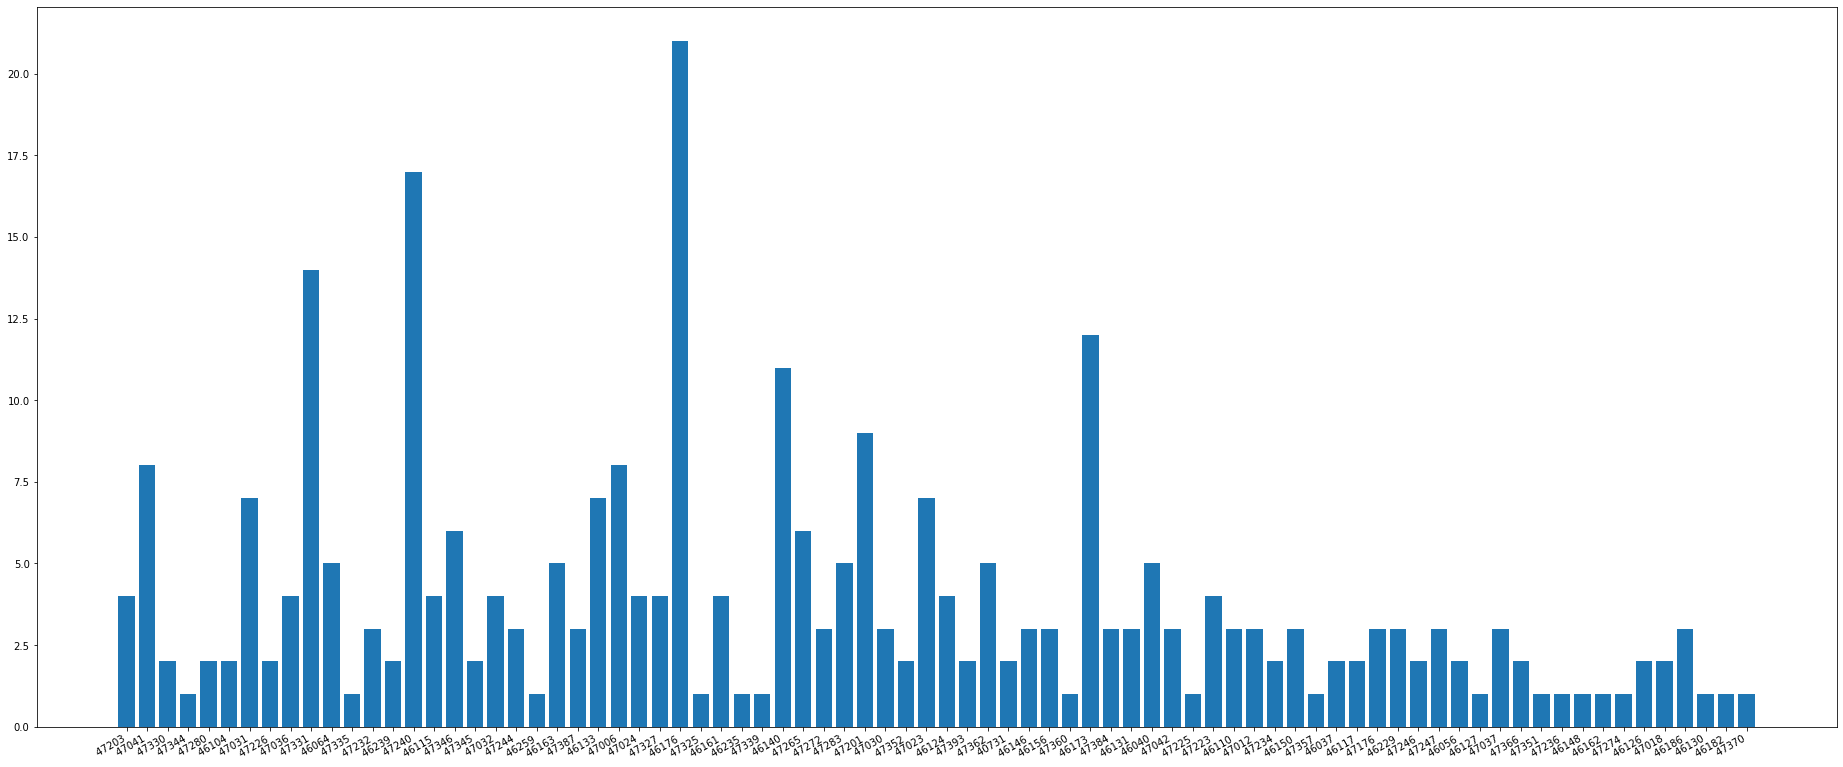

In [306]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize = (25, 10))
ax = fig.add_axes([0,0,1,1])
ax.bar(keys, count)
plt.setp(ax.get_xticklabels(), rotation=30, horizontalalignment='right')

plt.show()

### Conclusions

46176, followed by 47240, 47331, 46173, and 47041 had the most fast food restaurants with an average cost of 20 or less and minimum order of 50 or less. These would be the zipcodes to go to if you wanted the convenience of easily being able to find places to eat at. It's interesting to see that none of these zipcodes border each other.